# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Efendy]
- **Email:** [efendy.efendy77@gmail.com]
- **ID Dicoding:** [yusuke]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan musim dan hari kerja/non-hari kerja?
- Pertanyaan 2 : Faktor lingkungan apa saja (cuaca, suhu, kelembaban, kecepatan angin) yang paling mempengaruhi jumlah penyewaan sepeda?

**Penjelasan :**

Setelah dilakukan proses eksplorasi dataset, kita melihat ada beberapa variabel yang diduga memiliki pengaruh terhadap perilaku sewa sepeda. Variabel tersebut adalah faktor musim (season) dan faktor hari kerja (working day) atau hari libur (non working day). Untuk itu, peneliti merumuskan pertanyaan pertama yang bertujuan untuk melihat apakah ada pola penggunaan sepeda berdasarkan musim dan hari kerja/non-hari kerja? Jika ada, bagaimana polanya?

Bila ternyata diketahui adanya pola penggunaan sepeda berdasarkan musim, pertanyaan kedua adalah variabel kondisi lingkungan manakah (cuaca, suhu udara, kecepatan udara dan kelembapan) yang paling berpengaruh?

## Import Semua Packages/Library yang Digunakan

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Penjelasan :**

Disini kita menggunakan berbagai library untuk mendukung proses pengolahan dan analisis data, sbb :

- library pandas yang digunakan untuk memanipulasi dan menganalisis data.
- library numpy untuk membuat dan mengolah multi-dimensional arrays.
- library matplotlib untuk pembuatan visualisasi data.
- library seaborn untuk membuat visualisasi data yang atraktif dan informatif.

## Data Wrangling

**Penjelasan :**

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data  

In [76]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti dengan path file di Google Drive Anda
file_path = '/content/drive/My Drive/day.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gathering Data

**Penjelasan :**

Pada tahap ini, kita mengumpulkan data yang dibutuhkan untuk menjawab pertanyaan bisnis. Data yang digunakan diambil dari file day.csv saja. Sedangkan file hour.csv tidak digunakan karena dipandang kurang ada kaitan dengan pertanyaan yang diangkat untuk dicari jawabannya diatas. File hour.csv lebih cocok digunakan bilamana hendak mengetahui apakah ada pola jam tertentu yang memiliki frekuensi tinggi maupun rendah dalam penyewaan sepeda. Untuk mengkonfirmasi bahwa data telah dapat terbaca, maka kami menampilkan sebagian dari file csv untuk ditampilkan seperti dibawah ini.

In [78]:
data = pd.read_csv(file_path)

data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


**Insight:**
- Dataset berisi informasi penyewaan sepeda dari tahun 2011-2012, dimana untuk tahun 2011 diberi kode 0, dan tahun 2012 diberi kode 1.
- Dataset terdiri dari berbagai data kuantitatif dengan tipe data sbb :
  *   Tipe data nominal : dtday, season, yr, mnth, weathersit, casual, registered, cnt
  *   Tipe data diskret : holiday, weekday, workingday
  *   Tipe data kontinu : temp, atemp, hum, windspeed
- Variabel yang akan kita amati adalah :
  *   variabel dependen = jumlah penyewa sepeda (cnt)
  *   variabel independen :
      *   Hari kerja/libur (workingday), dimana :
           *   angka 1 menunjukkan hari kerja
           *   angka 0 menunjukkan hari libur
      *   Musim (season), dimana :
           *   angka 1 menunjukkan spring
           *   angka 2 menunjukkan summer
           *   angka 3 menunjukkan fall
           *   angka 4 menunjukkan winter
      *   Suhu udara (temp atau atemp)
      *   Kecepatan angin (windspeed)
      *   Kelembapan udara (hum)
      *   Cuaca (weathersit), dimana :
           *   angka 1 menunjukkan Clear, Few clouds, Partly cloudy, Partly cloudy
           *   angka 2 menunjukkan Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
           *   angka 3 menunjukkan Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
           *   angka 4 menunjukkan Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


### Assessing Data

Penjelasan :

Tahap assesing data untuk menilai kualitas dan struktur dari sebuah data. Selain itu juga untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, invalid data, duplicate data, dan adanya outlier.

In [79]:
# Informasi tentang kolom dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [80]:
# Cek nilai NaN di setiap kolom
missing_values = data.isnull().sum()

# Tampilkan jumlah nilai NaN
print("Jumlah nilai NaN di setiap kolom:")
print(missing_values)

Jumlah nilai NaN di setiap kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [81]:
# Cek apakah ada duplikasi di dataset
duplicate_rows = data[data.duplicated()]

# Tampilkan jumlah baris duplikat
print(f"Jumlah duplikat: {duplicate_rows.shape[0]}")

Jumlah duplikat: 0


In [82]:
# Daftar kolom numerik yang ingin diperiksa
kolom_numerik = ['cnt', 'workingday', 'season', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit']

# Fungsi untuk mencari outlier pada satu kolom
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Iterasi melalui setiap kolom numerik dan cari outlier
for kolom in kolom_numerik:
    outliers = find_outliers(data[kolom])
    print(f"Outliers pada kolom {kolom}: {outliers}")

Outliers pada kolom cnt: []
Outliers pada kolom workingday: []
Outliers pada kolom season: []
Outliers pada kolom temp: []
Outliers pada kolom atemp: []
Outliers pada kolom hum: [0.187917, 0.0]
Outliers pada kolom windspeed: [0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429, 0.409212, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]
Outliers pada kolom weathersit: []


**Insight Assessing Data:**
- Semua kolom memiliki nilai lengkap tanpa adanya nilai NaN sehingga tidak ada missing value.
- Semua kolom menunjukkan kesesuaian tipe data dengan isi yang ada , kecuali kolom dteday dimana bertipe object, karena itu kita perlu ubah menjadi tipe data datetime untuk memudahkan analisis berbasis waktu (seperti tren musiman atau tahunan).
- Tidak ditemukan data duplikat dalam dataset.
- Terdapat outliers pada kolom hum dan windspeed.

### Cleaning Data

Penjelasan :

Pada tahap ini, semua permasalahan data yang telah ditemukan akan dibersihkan sebelum masuk tahap analisis data.

In [83]:
# Ubah kolom dteday ke format datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Cek apakah konversi berhasil
print(data['dteday'].head())


0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]


**Penjelasan**: Kolom dteday telah berhasil diubah ke tipe data datetime

In [86]:
# Fungsi untuk mencari indeks baris yang mengandung outlier
def find_outlier_indices(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = data[(data < lower_bound) | (data > upper_bound)].index
    return outlier_indices

# Temukan indeks baris yang mengandung outlier pada kolom 'hum' dan 'windspeed'
outlier_indices_hum = find_outlier_indices(data['hum'])
outlier_indices_windspeed = find_outlier_indices(data['windspeed'])

# Gabungkan indeks outlier
all_outlier_indices = np.concatenate([outlier_indices_hum, outlier_indices_windspeed])

# Hapus baris yang mengandung outlier
data_clean = data.drop(index=all_outlier_indices)

In [85]:
# Menyimpan data_clean.csv di google drive
data_clean.to_csv('/content/drive/My Drive/data_clean.csv', index=False)

In [87]:
# Daftar kolom numerik yang ingin diperiksa
kolom_numerik = ['cnt', 'workingday', 'season', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit']

# Fungsi untuk mencari outlier pada satu kolom
def find_outliers(data_clean):
    Q1 = np.percentile(data_clean, 25)
    Q3 = np.percentile(data_clean, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data_clean if x < lower_bound or x > upper_bound]
    return outliers

# Iterasi melalui setiap kolom numerik dan cari outlier
for kolom in kolom_numerik:
    outliers = find_outliers(data_clean[kolom])
    print(f"Outliers pada kolom {kolom}: {outliers}")

Outliers pada kolom cnt: []
Outliers pada kolom workingday: []
Outliers pada kolom season: []
Outliers pada kolom temp: []
Outliers pada kolom atemp: []
Outliers pada kolom hum: []
Outliers pada kolom windspeed: [0.375617, 0.378108, 0.376871]
Outliers pada kolom weathersit: []


Penjelasan :
Setelah dilakukan penghapusan nilai outlier dengan menggunakan method drop, maka kita lakukan pemeriksaan ulang untuk memastikan tidak terdapat outlier. Dari pemeriksaan, nampak muncul outlier baru sebanyak 3 outlier pada kolom windspeed, yakni 0.375617, 0.378108, 0.376871.

**Insight :**

- Pada awalnya, terdeteksi adanya data outlier. Metode untuk atasi outlier ini adalah dengan menghapus baris dimana untuk hum hanya ada 1 baris, sedangkan untuk windspeed ada 13 baris, sehingga total keseluruhan baris yang dihapus hanya 13 baris. Karena 13 baris relatif kecil dibandingkan jumlah keseluruhan baris yang adalah 731 maka kami menghapusnya untuk mengatasi problem outliers ini. Setelah dihapus, maka dilakukan pemeriksaan ulang kembali untuk memastikan apakah masih ada outlier. Dari hasil pemeriksaan, nampak masih ada outlier pada kolom weathersit sebanyak 3. Karena jumlahnya sangat kecil yakni hanya 3 saja, dan dinilai tidak akan terlalu mengganggu proses analisa maka kami abaikan saja.

## Exploratory Data Analysis (EDA)

**Penjelasan :**

Setelah melewati proses cleaning, maka sampailah pada tahap Exploratory Data Analysis, dimana kita akan melakukan eksplorasi terhadap data yang telah dibersihkan untuk memperoleh insight dan menjawab pertanyaan analisis.

In [88]:
# Menambahkan kolom bulan dan tahun untuk analisis waktu
data_clean['year_month'] = data_clean['dteday'].dt.to_period('M')

# Menambahkan kolom year_month_season
data_clean['year_month_season'] = data_clean['year_month'].astype(str) + '_' + data_clean['season'].astype(str)

# Buat kamus untuk mapping angka ke nama musim
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Menambahkan kolom season_name menggunakan mapping
data_clean['season_name'] = data_clean['season'].map(season_mapping)

print(data_clean)

print(data_clean.dtypes)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.

**Penjelasan :**
- kolom year_month dibuat untuk kebutuhan visualisasi dan eksplanasi perihal trend sewa sepeda dari tahun 2011 hingga 2012.
- Kolom year_month_season dibuat untuk mengetahui hubungan season dengan sewa sepeda dari tahun 2011 hingga 2012.
- Kolom season_name dibuat untuk kebutuhan visualisasi hubungan season dengan sewa sepeda dari tahun 2011 hingga 2012.


In [89]:
# Pilih kolom numerik yang ingin dianalisis
kolom_analisis = ['cnt', 'workingday', 'season', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit']

# Hitung statistik deskriptif
deskripsi = data_clean[kolom_analisis].describe()

# Tampilkan hasil
print(deskripsi)

               cnt  workingday     season        temp       atemp         hum  \
count   717.000000  717.000000  717.00000  717.000000  717.000000  717.000000   
mean   4532.843794    0.684798    2.51325    0.497365    0.476252    0.631562   
std    1933.542429    0.464921    1.10555    0.183617    0.163155    0.139222   
min      22.000000    0.000000    1.00000    0.059130    0.079070    0.254167   
25%    3214.000000    0.000000    2.00000    0.337500    0.337939    0.524583   
50%    4570.000000    1.000000    3.00000    0.505833    0.491783    0.630833   
75%    6031.000000    1.000000    3.00000    0.656667    0.611121    0.732917   
max    8714.000000    1.000000    4.00000    0.861667    0.840896    0.972500   

        windspeed  weathersit  
count  717.000000  717.000000  
mean     0.186287    1.396095  
std      0.071786    0.543511  
min      0.022392    1.000000  
25%      0.134329    1.000000  
50%      0.178496    1.000000  
75%      0.230721    2.000000  
max      0.378

**Penjelasan** :

Berdasarkan rangkuman parameter statistik diatas, kita akan memperoleh informasi jumlah hari yang kita amati sebanyak 717 hari dalam rentang tahun 2011 - 2012. Dalam periode tersebut, rata-rata jumlah sewa sepeda sebesar 4532, dimana jumlah terendahnya yang pernah dicapai adalah sebesar 22/hari, dan terbesarnya sebesar 8714/hari, dengan standar deviasi sebesar 1933.

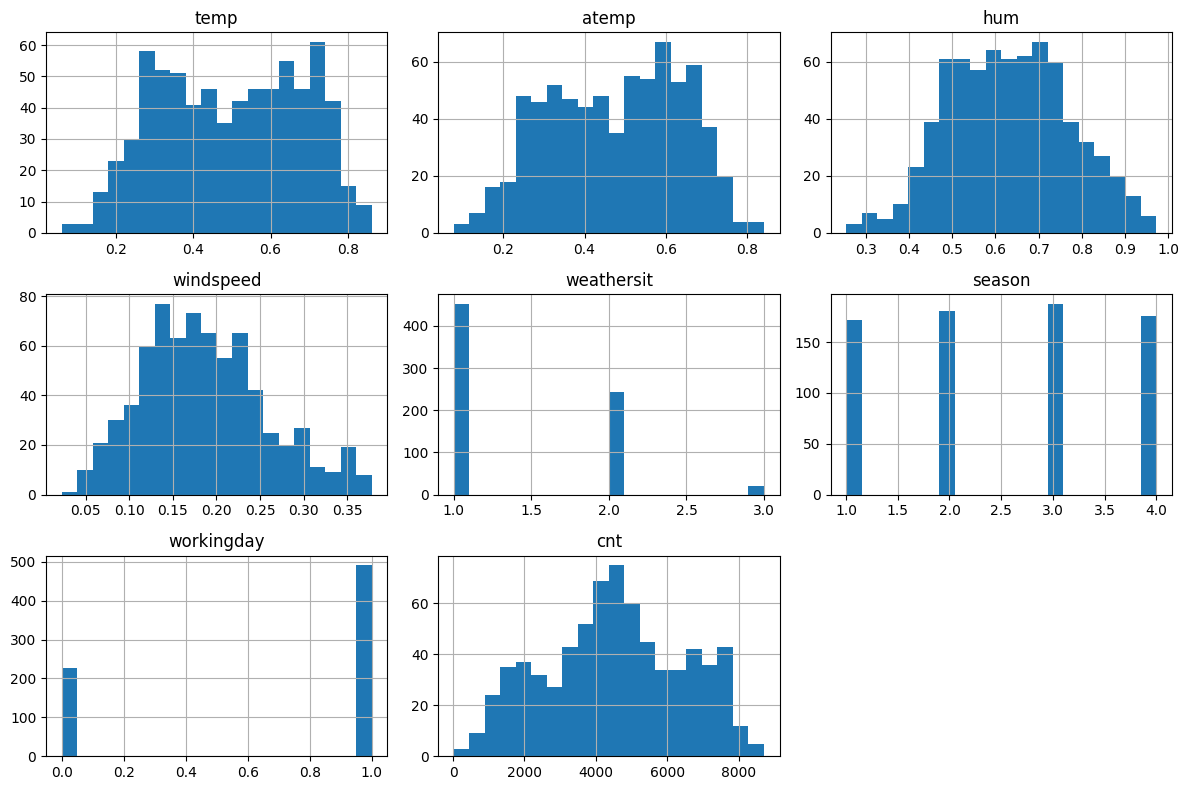

In [90]:
# Plot histogram untuk beberapa kolom numerik
data_clean[['temp', 'atemp','hum', 'windspeed', 'weathersit', 'season', 'workingday', 'cnt']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


**Insight** :

Berdasarkan plot histogram diatas, nampak bahwa distribusi data pada cnt, temp, atemp, hum, windspeed cenderung distribusi normal sempurna. Sedangkan untuk distribusi data pada workingday, season dan weathersit memiliki bentuk yang berbeda karena datanya bertipe kategori. Pada workingday, nampak bahwa data mayoritas adalah hari kerja (bernilai 1). Sedangkan pada season, data cenderung merata antara keempat kategori. Sedangkan pada weathersit, data mayoritas adalah Clear, Few clouds, Partly cloudy, Partly cloudy (kategori 1), diikuti dengan Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (kategori 2), yang artinya mayoritas data cuaca adalah dalam sebuah periode pengamatan adalah cuaca cerah.

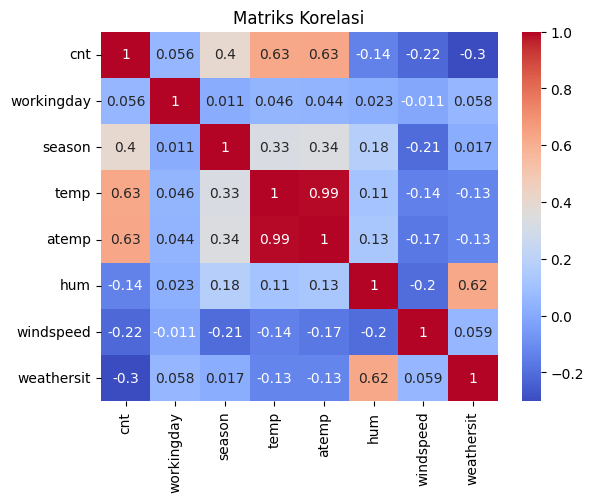

In [91]:
# Pilih kolom yang ingin dianalisis
kolom_analisis = ['cnt', 'workingday', 'season', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit']

# Hitung matriks korelasi
korelasi = data_clean[kolom_analisis].corr()

# Visualisasi matriks korelasi menggunakan heatmap
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


**Insight** :

- Angka workingday yang sangat kecil menunjukkan bahwa tidak memiliki korelasi dengan apapun.
- Angka korelasi diatas 0.5 menunjukkan adanya korelasi yang kuat, dalam hal ini ada pada :
  *   temp dengan atemp sebesar +0.99
  *   temp / atemp dengan cnt sebesar +0.63
  *   hum dengan weathersit sebesar +0.62
- Sedangkan korelasi antar variabel faktor lingkungan lainnya memiliki korelasi yang lemah karena angka korelasi dibawah 0.5.

## Visualization & Explanatory Analysis

**Penjelasan :**

Pada tahap ini, kita akan menjelaskan maupun memvisualisasikan data hasil eksploratori untuk mengomunikasikan temuan atau insight secara efektif.

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim dan hari kerja/non-hari kerja?

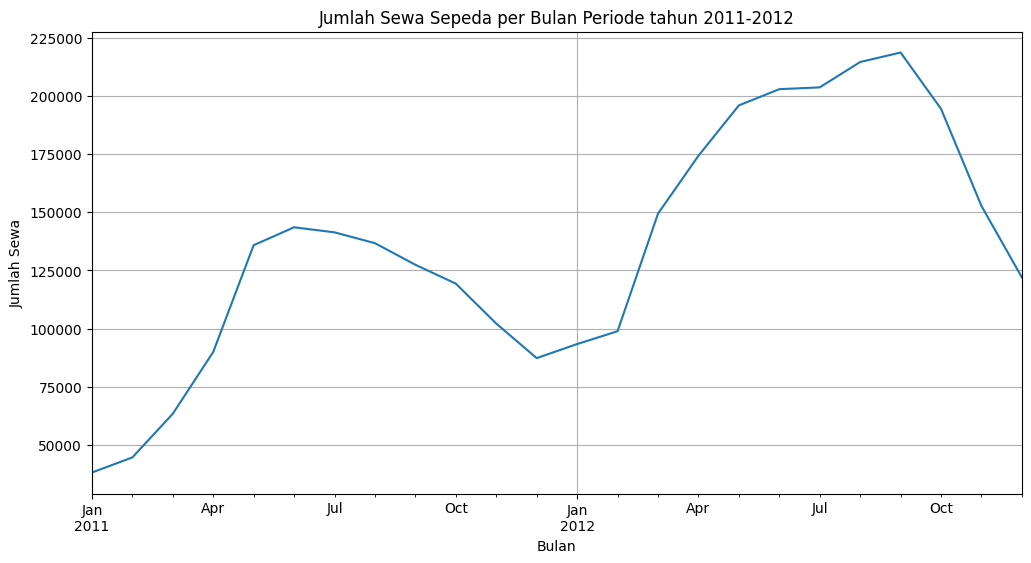

In [92]:
# Menampilkan jumlah sepeda sewa per bulan
monthly_rentals = data_clean.groupby('year_month')['cnt'].sum()

# Visualisasi tren sepeda yang disewa per bulan
monthly_rentals.plot(figsize=(12, 6), title='Jumlah Sewa Sepeda per Bulan Periode tahun 2011-2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()

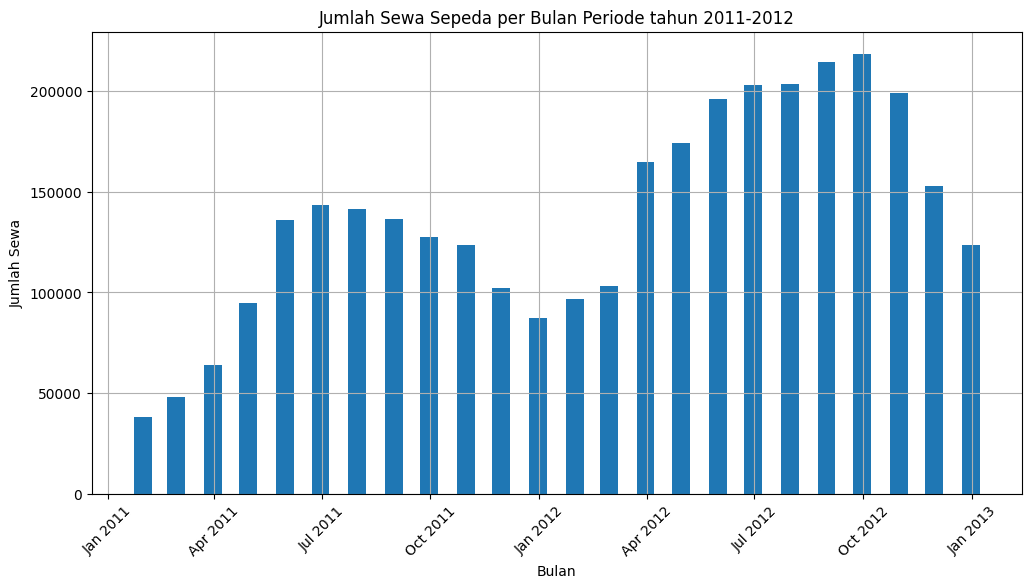

In [93]:
import matplotlib.dates as mdates  # Import mdates module

# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index, monthly_counts.values, width=15)

# Format sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.title('Jumlah Sewa Sepeda per Bulan Periode tahun 2011-2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()

**Insight** :

- Berdasarkan grafik garis maupun batang diatas, jumlah sewa sepeda dari tahun 2011 hingga 2012 mengalami peningkatan. Di tahun 2011 penyewaan sepeda tertinggi terjadi di bulan juni yakni sebesar 143.512 dalam sebulan, sedangkan terendahnya terjadi di bulan januari, yakni sebesar 38.189 dalam sebulan dimana sekaligus merupakan jumlah terendah selama tahun 2011-2012 ini. Sedangkan di tahun 2012 penyewaan sepeda tertinggi terjadi di bulan september yakni sebesar 218.573 dalam sebulan, sekaligus merupakan jumlah tertinggi selama tahun 2011-2012 ini, dan terendahnya juga terjadi di bulan januari, yakni sebesar 93.368 dalam sebulan.
- Berdasarkan grafik garis maupun batang diatas, terlihat bahwa dari awal tahun yakni bulan januari, jumlah sewa mengalami peningkatan hingga mencapai puncaknya di pertengahan tahun, dan kemudian kembali menurun hingga akhir tahun yakni bulan desember. Pola seperti ini terlihat di tahun 2011 dan 2012.

In [94]:
# Kelompokkan data berdasarkan season_name dan hitung jumlah cnt
result = data_clean.groupby('season_name')['cnt'].sum().reset_index()

print(result)

  season_name      cnt
0        fall  1061129
1      spring   447840
2      summer   908121
3      winter   832959


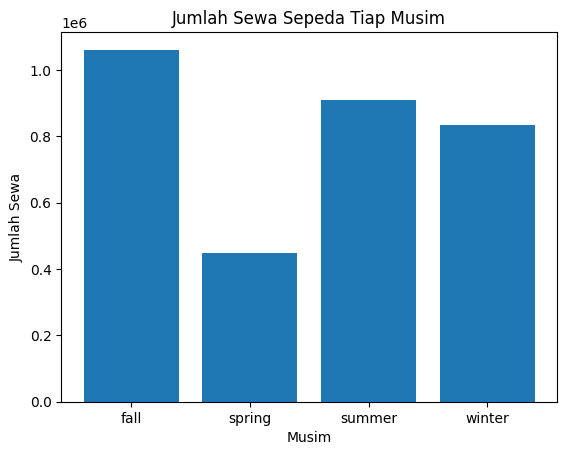

In [95]:
# Membuat grafik batang
plt.bar(result['season_name'], result['cnt'])

# Memberikan judul dan label pada sumbu
plt.title('Jumlah Sewa Sepeda Tiap Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')

# Menampilkan grafik
plt.show()

In [96]:
# Kelompokkan data berdasarkan tahun, season_name, dan hitung jumlah cnt
result = data_clean.groupby([data_clean['dteday'].dt.year, 'season_name'])['cnt'].sum().reset_index()

# Rename kolom untuk lebih jelas
result.columns = ['year', 'season_name', 'total_cnt']

print(result)

   year season_name  total_cnt
0  2011        fall     419650
1  2011      spring     145829
2  2011      summer     342406
3  2011      winter     321942
4  2012        fall     641479
5  2012      spring     302011
6  2012      summer     565715
7  2012      winter     511017


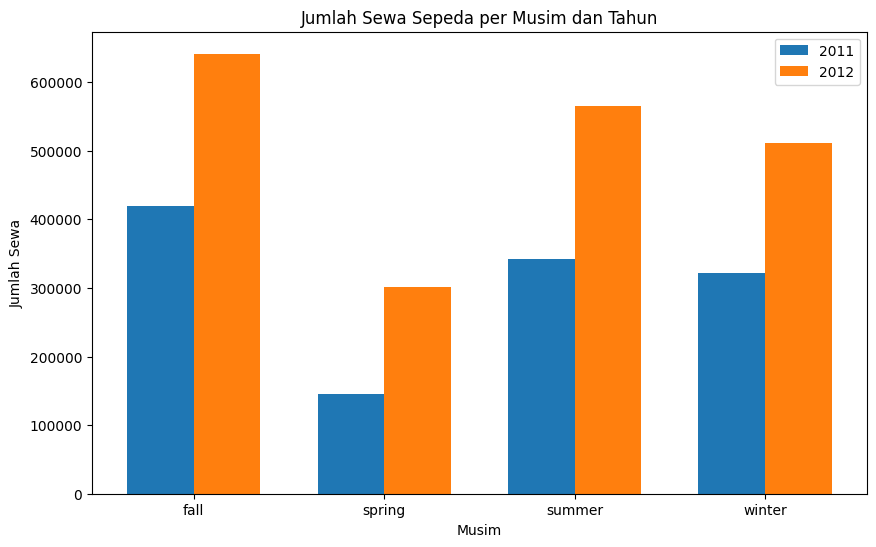

In [98]:
# Kelompokkan data berdasarkan tahun, season_name, dan hitung jumlah cnt
result = data_clean.groupby([data_clean['dteday'].dt.year, 'season_name'])['cnt'].sum().reset_index()
result.columns = ['year', 'season_name', 'total_cnt']

# Membuat diagram batang berdampingan
plt.figure(figsize=(10, 6))

# Tentukan lebar setiap batang dan jarak antar kelompok batang
width = 0.35

# Hitung posisi x untuk setiap batang
x = np.arange(len(result['season_name'].unique()))

# Iterasi untuk setiap tahun
for i, year in enumerate(result['year'].unique()):
    plt.bar(x + i*width,
            result[result['year'] == year]['total_cnt'],
            width=width,
            label=str(year))

# Menambahkan judul, label sumbu, dan legend
plt.title('Jumlah Sewa Sepeda per Musim dan Tahun')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.xticks(x + width/2, result['season_name'].unique())  # Atur posisi x-ticks
plt.legend()

plt.show()

**Insight :**
- Jika dilihat secara musiman, berdasarkan data tabel maupun grafik musim diatas, nampak bahwa baik di tahun 2011 maupun 2012 jumlah sewa tertinggi terjadi di saat musim gugur (fall) dan jumlah sewa terendah terjadi di saat musim semi (spring). Selain itu juga terlihat adanya pola yang berulang dari tahun 2011 maupun 2012, yakni penyewaan sewa mencapai jumlah tertingginya selalu di musim gugur (fall), sedangkan mencapai jumlah sewa terendahnya di musim semi (spring), sedangkan di musim summer maupun winter relatif stabil atau tak berfluktuasi.

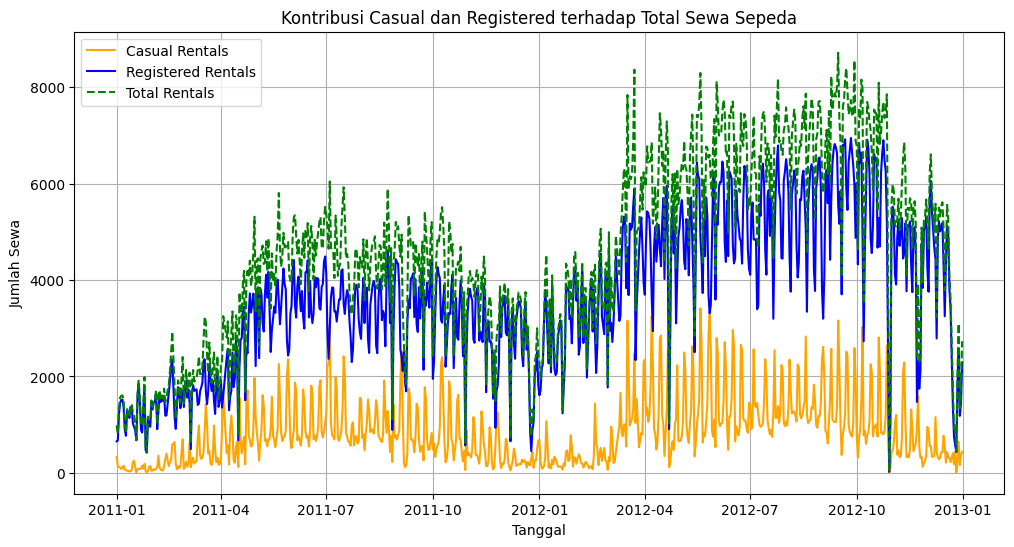

In [100]:
# Visualisasi kontribusi casual dan registered terhadap cnt
plt.figure(figsize=(12, 6))

# Plot untuk casual dan registered
plt.plot(data_clean['dteday'], data_clean['casual'], label='Casual Rentals', color='orange')
plt.plot(data_clean['dteday'], data_clean['registered'], label='Registered Rentals', color='blue')

# Total sewa (cnt)
plt.plot(data_clean['dteday'], data_clean['cnt'], label='Total Rentals', color='green', linestyle='--')

plt.title('Kontribusi Casual dan Registered terhadap Total Sewa Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa')
plt.legend()
plt.grid(True)
plt.show()

**Insight** :
- Berdasarkan grafik diatas, baik penyewa casual maupun registered memiliki pola yang sama, meskipun penyewa registered relatif lebih berfluktuatif daripada casual.
- Selain itu juga nampak bahwa komponen jumlah penyewa registered jauh lebih besar daripada penyewa casual dalam keseluruhan total penyewa.

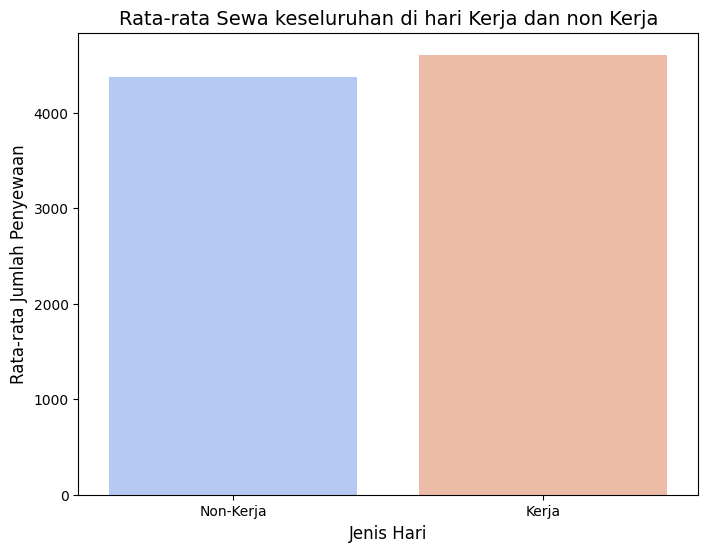

In [101]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan workingday
workingday_rentals = data_clean.groupby('workingday')['cnt'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_rentals, hue='workingday', palette='coolwarm', legend=False)
plt.title('Rata-rata Sewa keseluruhan di hari Kerja dan non Kerja', fontsize=14)
plt.xlabel('Jenis Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks([0, 1], ['Non-Kerja', 'Kerja'])
plt.show()

Insight :
Berdasarkan grafik diatas, tidak terlihat adanya perbedaan yang signifikan antara jumlah sewa sepeda secara keseluruhan di hari kerja maupun di hari non kerja.

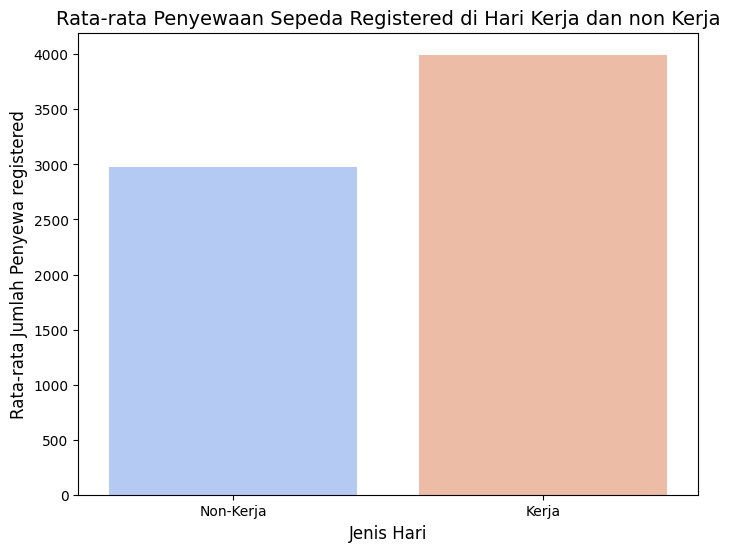

In [102]:
# Menghitung rata-rata jumlah penyewaan sepeda Registered berdasarkan workingday
workingday_registered = data_clean.groupby('workingday')['registered'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='registered', data=workingday_registered, hue='workingday', palette='coolwarm', legend=False)
plt.title('Rata-rata Penyewaan Sepeda Registered di Hari Kerja dan non Kerja', fontsize=14)
plt.xlabel('Jenis Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa registered', fontsize=12)
plt.xticks([0, 1], ['Non-Kerja', 'Kerja'])
plt.show()

Insight : Jika dilihat dari sisi penyewa registered, ada perbedaan yang cukup tebal antara hari kerja dan non kerja seperti yang ditampilkan pada grafik diatas, dimana di hari kerja lebih banyak menyewa sepeda daripada hari non kerja.

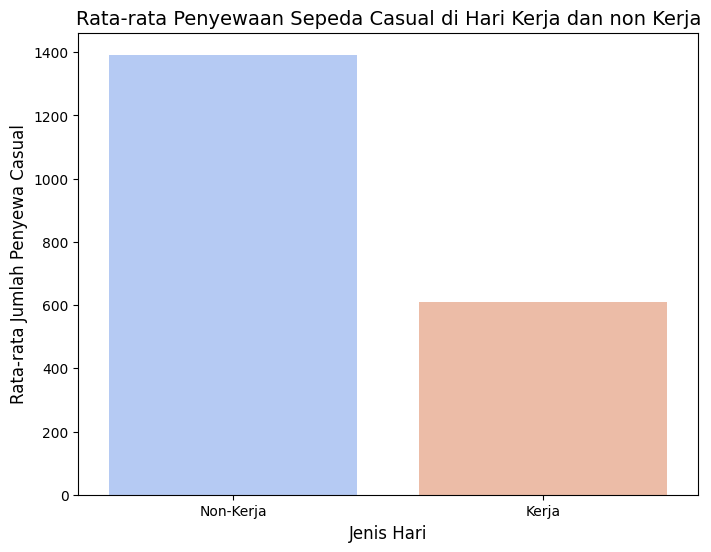

In [103]:
# Menghitung rata-rata jumlah penyewaan sepeda Casual berdasarkan workingday
workingday_casual = data_clean.groupby('workingday')['casual'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='casual', data=workingday_casual, hue='workingday', palette='coolwarm', legend=False)
plt.title('Rata-rata Penyewaan Sepeda Casual di Hari Kerja dan non Kerja', fontsize=14)
plt.xlabel('Jenis Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa Casual', fontsize=12)
plt.xticks([0, 1], ['Non-Kerja', 'Kerja'])
plt.show()


Insight :
Sedangkan jika dilihat dari sisi penyewa casual, nampak begitu besar perbedaan jumlah sewa antara hari kerja dan non kerja seperti yang ditampilkan oleh grafik diatas, dimana di hari kerja jauh lebih rendah daripada di hari kerja.

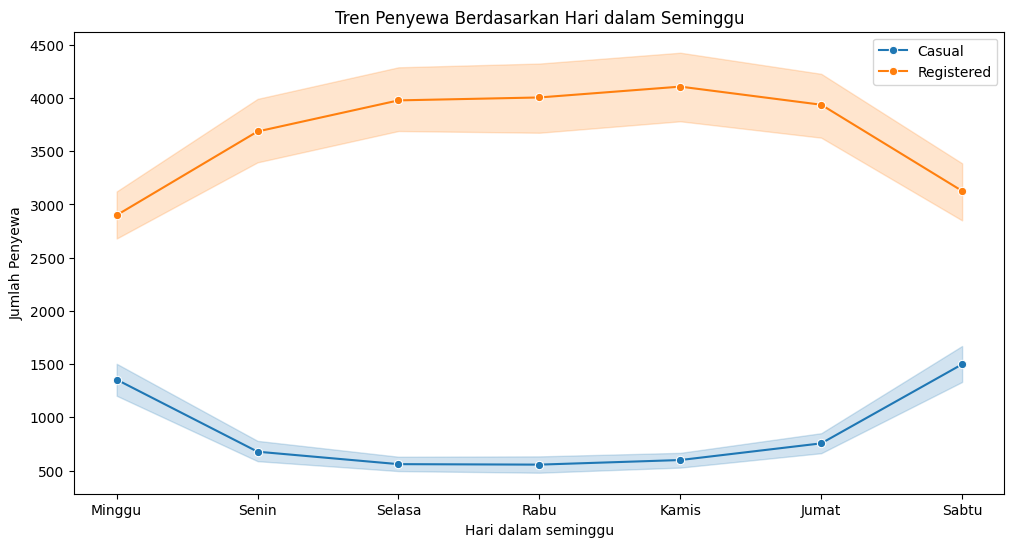

In [104]:
# Daftar nama hari
hari = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]

# Membuat plot tren penyewa casual dan registered berdasarkan weekday
plt.figure(figsize=(12, 6))
sns.lineplot(x="weekday", y="casual", data=data_clean, label="Casual", marker="o")
sns.lineplot(x="weekday", y="registered", data=data_clean, label="Registered", marker="o")

# Mengatur label sumbu x
plt.xticks(range(7), hari)

plt.title("Tren Penyewa Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam seminggu")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()

**Insight** :

Jika dilihat secara data mingguan (weekday) seperti yang ditampilkan grafik diatas, semakin terkonfirmasi bahwa penyewa casual lebih banyak menyewa di hari sabtu dan minggu (notabene biasanya merupakan hari non kerja), sedangkan penyewa registered lebih banyak menyewa di hari senin hingga jumat dengan jumlah yang relatif stabil (notabene biasanya merupakan hari kerja).

### Pertanyaan 2: Faktor lingkungan apa saja (cuaca, suhu, kecepatan udara, kelembaban) yang paling mempengaruhi jumlah penyewaan sepeda?

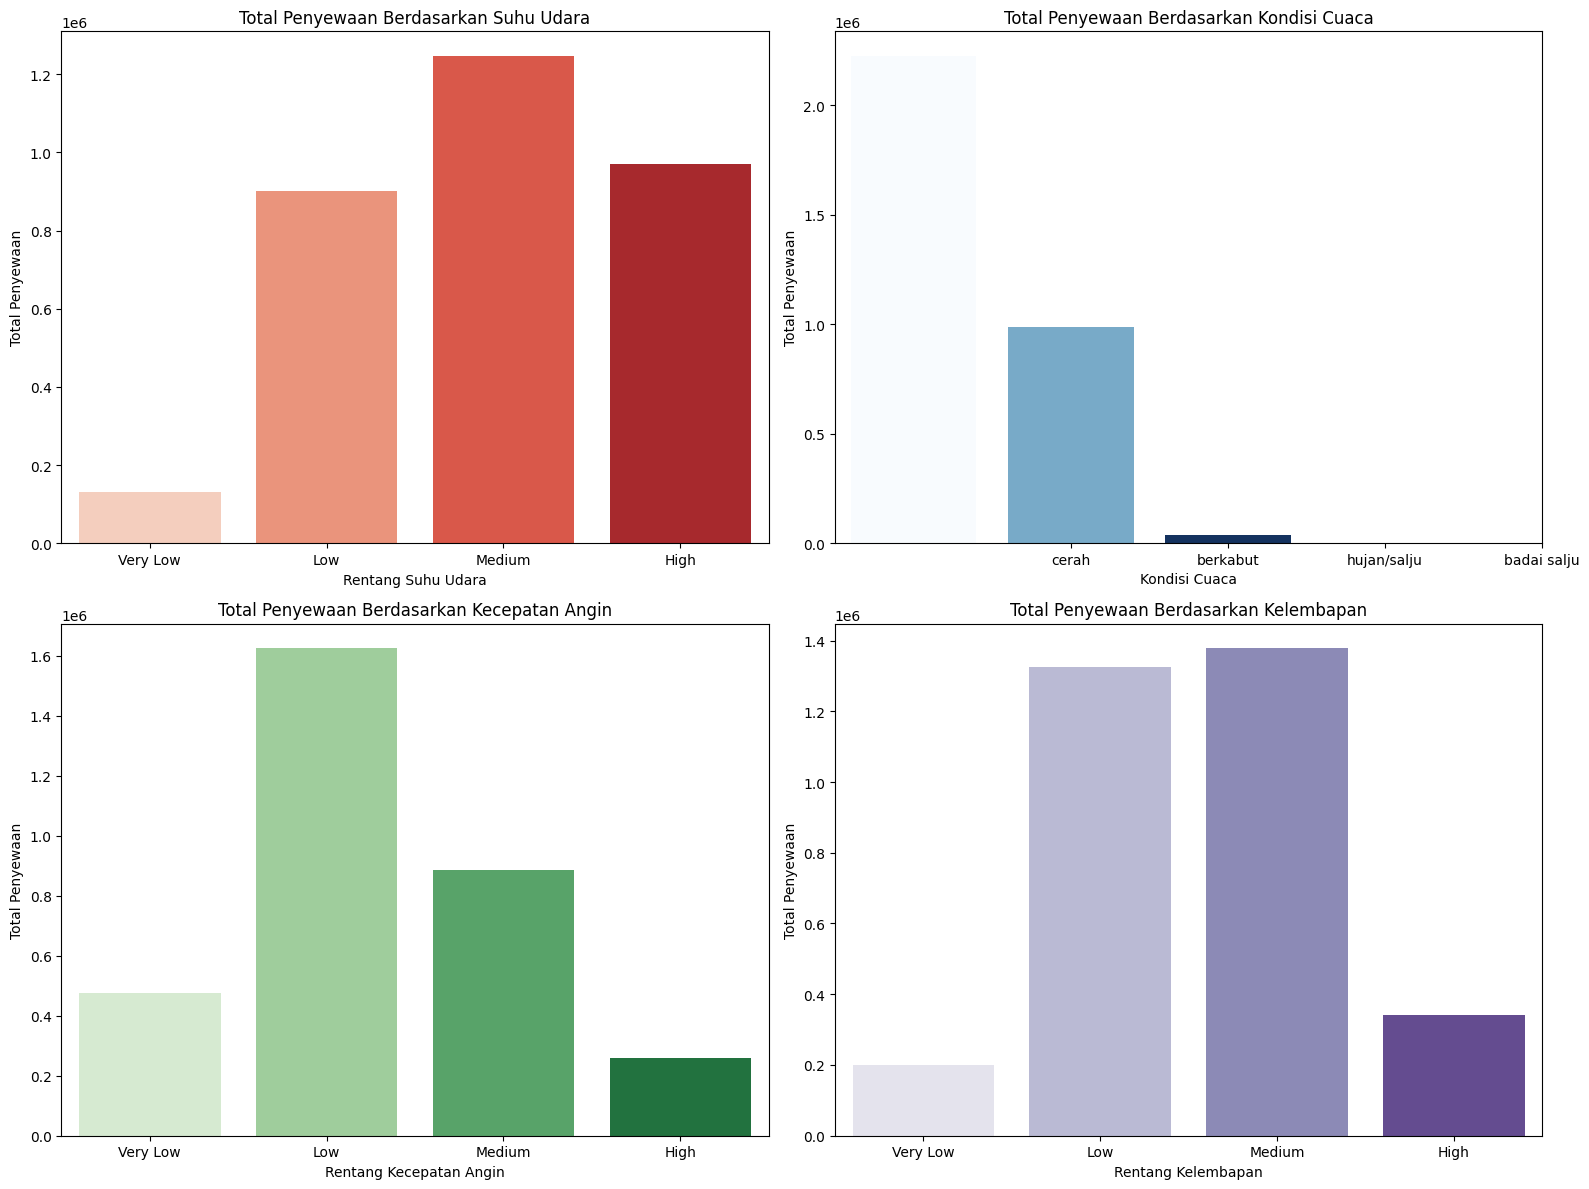

In [108]:
# Membagi interval untuk faktor numerik
data_clean['temp_range'] = pd.cut(data_clean['temp'], bins=np.linspace(data_clean['temp'].min(), data_clean['temp'].max(), 5), labels=['Very Low', 'Low', 'Medium', 'High'])
data_clean['atemp_range'] = pd.cut(data_clean['atemp'], bins=np.linspace(data_clean['atemp'].min(), data_clean['atemp'].max(), 5), labels=['Very Low', 'Low', 'Medium', 'High'])
data_clean['windspeed_range'] = pd.cut(data_clean['windspeed'], bins=np.linspace(data_clean['windspeed'].min(), data_clean['windspeed'].max(), 5), labels=['Very Low', 'Low', 'Medium', 'High'])
data_clean['hum_range'] = pd.cut(data_clean['hum'], bins=np.linspace(data_clean['hum'].min(), data_clean['hum'].max(), 5), labels=['Very Low', 'Low', 'Medium', 'High'])

# Faktor 1: Suhu udara (temp)
temp_rentals = data_clean.groupby('temp_range', observed=False)['cnt'].sum().reset_index()

# Faktor 2: Cuaca (weathersit)
weather_rentals = data_clean.groupby('weathersit', observed=False)['cnt'].sum().reset_index()

# Faktor 3: Kecepatan angin (windspeed)
windspeed_rentals = data_clean.groupby('windspeed_range', observed=False)['cnt'].sum().reset_index()

# Faktor 4: Kelembapan (hum)
humidity_rentals = data_clean.groupby('hum_range', observed=False)['cnt'].sum().reset_index()

# Membuat grafik untuk masing-masing faktor
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Grafik 1: Suhu udara
sns.barplot(x='temp_range', y='cnt', hue='temp_range', data=temp_rentals, palette='Reds', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Total Penyewaan Berdasarkan Suhu Udara')
axs[0, 0].set_xlabel('Rentang Suhu Udara')
axs[0, 0].set_ylabel('Total Penyewaan')

# Grafik 2: Cuaca
sns.barplot(x='weathersit', y='cnt', hue='weathersit', data=weather_rentals, palette='Blues', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Total Penyewaan Berdasarkan Kondisi Cuaca')
axs[0, 1].set_xlabel('Kondisi Cuaca')
axs[0, 1].set_ylabel('Total Penyewaan')

# Mengganti label sumbu x
ticks = [1, 2, 3, 4]
labels = ['cerah', 'berkabut', 'hujan/salju', 'badai salju']
axs[0, 1].set_xticks(ticks)
axs[0, 1].set_xticklabels(labels)

# Grafik 3: Kecepatan angin
sns.barplot(x='windspeed_range', y='cnt', hue='windspeed_range', data=windspeed_rentals, palette='Greens', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Total Penyewaan Berdasarkan Kecepatan Angin')
axs[1, 0].set_xlabel('Rentang Kecepatan Angin')
axs[1, 0].set_ylabel('Total Penyewaan')

# Grafik 4: Kelembapan
sns.barplot(x='hum_range', y='cnt', hue='hum_range', data=humidity_rentals, palette='Purples', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Total Penyewaan Berdasarkan Kelembapan')
axs[1, 1].set_xlabel('Rentang Kelembapan')
axs[1, 1].set_ylabel('Total Penyewaan')

plt.tight_layout()
plt.show()

**Penjelasan** :

Grafik diatas menunjukkan jumlah sewa sepeda di setiap level untuk masing-masing faktor lingkungan, yaitu suhu udara (temp/atemp), cuaca (weathersit), kecepatan angin (windspeed), dan kelembapan (hum).

Langkah pembuatan grafik tersebut sebagai berikut :
*   Langkah 1 : Kelompokkan data berdasarkan setiap faktor lingkungan yang akan diamati, yaitu suhu udara (temp/atemp), cuaca (weathersit), kecepatan angin (windspeed), dan kelembapan (hum). Untuk sumbu x pada weathersit kita gunakan kategori sbb :
    *   kategori 1 : cerah
    *   kategori 2 : berkabut
    *   kategori 3 : hujan / salju
    *   kategori 4 : badai salju
Untuk variabel numerik (temp, atemp, windspeed, hum), kita bisa membagi data menjadi beberapa interval agar mudah divisualisasikan.
*   Langkah 2 : Hitung total penyewaan untuk setiap kelompok:
Total penyewaan dihitung dengan menjumlahkan dari kolom cnt untuk setiap kelompok.
*   Langkah 3 : Buat grafik bar untuk setiap faktornya.

**Insight :** Cuaca cerah dimana suhu udaranya tidak terlalu dingin ataupun panas serta kecepatan angin maupun kelembapan yang sedang merupakan kondisi yang paling disukai oleh penyewa sepeda.




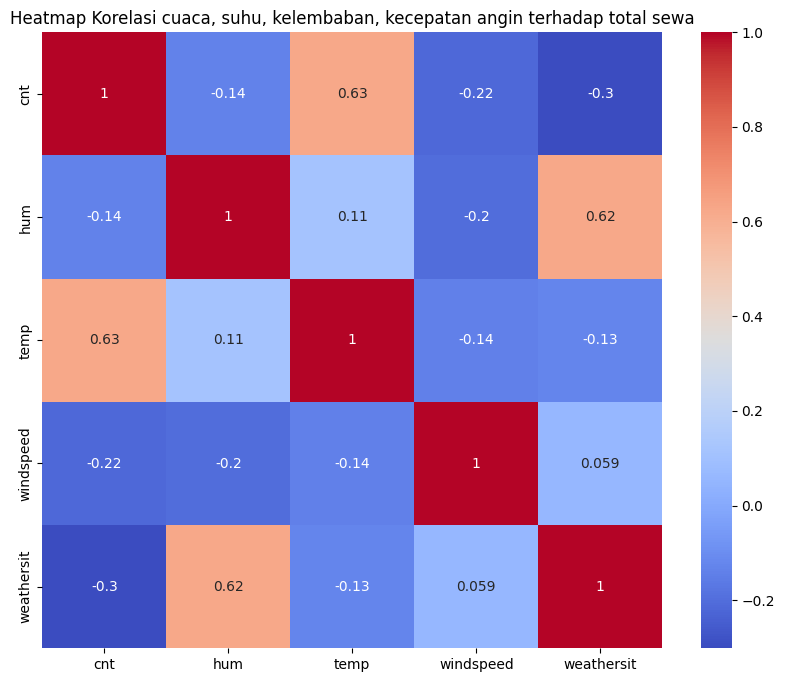

In [107]:
# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
correlation = data_clean[["cnt", "hum", "temp", "windspeed", "weathersit" ]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi cuaca, suhu, kelembaban, kecepatan angin terhadap total sewa")
plt.show()

**Penjelasan :**
- Kelembapan (humidity) memiliki korelasi negatif yang lemah yakni sebesar -0.14
- Suhu udara (temp) memiliki korelasi positif yang sangat kuat yakni sebesar 0.63
- kecepatan udara (windspeed) memiliki korelasi negatif yang lemah yakni sebesar -0.22
- Cuaca (Weathersit) memiliki korelasi negatif moderat yakni sebesar -0.3

**Insight:** Berdasarkan matrik korelasi diatas, hanya faktor suhu udara yang memiliki korelasi paling kuat terhadap penyewaan sepeda, dimana semakin baik suhu udaranya akan mendorong orang menyewa sepeda (untuk menikmati suhu udara tersebut).

## Conclusion

**Penjelasan :**

Tahapan ini merupakan akhir dari proyek analisis data, dimana kita akan membuat kesimpulan dari keseluruhan proses analisa yang telah kita lakukan. Kesimpulan yang dibuat haruslah menjawab semua pertanyaan telah didefinisikan di awal.
Selain membuat kesimpulan, kita juga perlu membagikan temuan atau insight dari hasil analisis.

**Conclution pertanyaan 1 - Bagaimana pola penggunaan sepeda berdasarkan musim dan hari kerja/non-hari kerja? :**

- Di tahun 2011 maupun 2012 nampak adanya pola yang sama terjadi yakni jumlah penyewaan sepeda tertinggi terjadi di musim fall, dan jumlah penyewaan sepeda terendah terjadi di musim spring, sedangkan di musim lainnya relatif sama jumlahnya. Hal ini juga didukung oleh hasil matrix korelasi yang menunjukkan bahwa faktor musim (season) memiliki korelasi positif cukup kuat terhadap sewa sepeda yakni sebesar 0.4. Berdasarkan hal tersebut, maka jawaban atas pertanyaan bisnis pertama adalah nampak adanya pola penggunaan sepeda berdasarkan musim.

- Berdasarkan diagram batang, jumlah sewa sepeda di hari kerja maupun di hari non kerja tidaklah terlalu berbeda meskipun di hari kerja lebih tinggi sedikit daripada di hari non kerja. Perbedaan tipis tersebut disebabkan oleh penyewa registered menjadi komponen terbesar dari keseluruhan penyewa, dimana selama 2 tahun periode pengamatan, jumlah penyewa registered jauh lebih banyak (sebanyak 2.635.620 atau 81%) daripada penyewa casual (sebanyak 614.429 atau 19%). Lagipula penyewa registered lebih banyak menyewa di saat hari kerja, sebaliknya penyewa casual di hari non kerja, sedangkan jumlah hari kerja lebih banyak daripada jumlah hari non kerja dalam periode pengamatan. Berdasarkan hal tersebut, maka jawaban atas pertanyaan bisnis pertama adalah tidak nampak adanya pola penggunaan sepeda berdasarkan hari kerja, dengan alasan tidak ada perbedaan yang cukup berarti antara jumlah sewa di hari kerja dan non kerja.


**Conclution pertanyaan 2 - Faktor lingkungan apa saja (cuaca, suhu, kelembaban, kecepatan angin) yang paling mempengaruhi jumlah penyewaan sepeda? :**

- Berdasarkan grafik total sewa sepeda dengan faktor suhu udara, nampak bahwa penyewaan sepeda sangat banyak terjadi disaat suhu udara dalam rentang low hingga high, dimana penyewaan sepeda terbanyak sebanyak 8714 dalam sehari terjadi di saat suhu udara 0.6 (dari range suhu udara ('temp') 0.05 s/d 0.86). Selain itu, berdasarkan grafik, penyewaan sepeda kebanyakan dilakukan saat cuaca cerah. Sedangkan jika dilihat dari kecepatan angin, nampak bahwa penyewa sepeda lebih menyukai angin dengan kecepatan yang pelan hingga sedang, meskipun ada penyewa yang tak mempermasalahkan jika kecepatan udara sangat pelan maupun kencang. Hal serupa juga didapati pada faktor kelembapan, dimana penyewa sepeda lebih menyukai tingkat kelembapan yang rendah dan sedang, meskipun ada beberapa penyewa yang tak mempermasalahkan kelembapan yang sangat rendah dan tinggi.

- Berdasarkan hal tersebut diatas, secara bersamaan keempat faktor tersebut mengindikasikan bahwa cuaca yang cerah yakni saat suhu udaranya tidak terlalu dingin ataupun panas serta kecepatan angin maupun kelembapan yang sedang merupakan kondisi yang dianggap tepat untuk bersepeda atau kondisi yang paling disukai oleh penyewa sepeda. Namun demikian, berdasarkan diagram matriks korelasi, diantara keempat faktor tersebut (cuaca, suhu udara, kecepatan angin dan kelembapan) hanya faktor suhu udara saja yang memiliki korelasi yang paling kuat terhadap jumlah penyewaan sepeda, yakni sebesar +0.63. Sedangkan ketiga faktor yang lainnya hanya berkorelasi lemah (angka korelasinya kurang dari 0.5). Oleh karena itu, jawaban atas pertanyaan kedua adalah suhu udara terindikasi sebagai faktor yang paling mempengaruhi jumlah penyewaan sepeda dimana memiliki korelasi positif yang kuat terhadap jumlah sewa sepeda (korelasi sebesar +0.63).


**Saran dan rekomendasi :**

Perusahaan telah berhasil mencapai performa yang bagus di tahun 2011 hingga 2012, yakni jumlah sewa sepeda keseluruhan mengalami peningkatan sebesar 64% (dari 1.229.827 menjadi 2.020.222), dimana jumlah sewa registered meningkat sebesar 68% (dari 984.733 menjadi 1.650.887) dan jumlah sewa casual meningkat sebesar 51% (dari 245.094 menjadi 369.335). Kesadaran yang tinggi dari masyarakat akan kondisi climate crisis ikut mendorong kinerja perusahaan. Selain itu, kemampuan perusahaan untuk mengemas layanan sewa sepeda sebagai layanan transportasi yang praktis (tanpa perlu mengeluarkan uang untuk membeli sepeda maupun repot membawa sepeda kemana-mana) dan cepat menuju ke tempat kerja (seiring banyaknya hub / terminal sepeda yang tersebar) semakin mendorong orang untuk menggunakan sepeda sebagai dalam aktivitas kerja rutinnya.

Berikut saran atau rekomendasi yang konkret agar sistem penyewaan sepeda dapat ditingkatkan, baik dari segi efisiensi operasional, kepuasan pelanggan, maupun potensi peningkatan pendapatan :

**Saran untuk peningkatan pendapatan:**
- Seiring data yang menunjukkan pola sewa sepeda terendah di bulan januari hingga maret, maka perusahaan bisa memberikan stimulus atau insentif lebih berupa program diskon atau lainnya dengan tujuan meningkatkan jumlah sewa sepeda di bulan tersebut.
- Membuat program promosi diskon yang menarik bagi new member, dengan bekerjasama dengan berbagai pihak misalnya reward voucher menonton bioskop, atau mendapatkan voucher makan di mcdonald.
- Iklan yang menggambarkan manfaat dan kenyamanan bersepeda sebagai transportasi dalam bekerja maupun sebagai sarana rekreasi untuk menarik minat dari orang yang belum mengetahui jasa sewa sepeda ini.
- Menawarkan jasa penyewaan sepeda secara corporate bagi karyawan sebuah perusahaan dengan tarif khusus untuk menjangkau berbagai perusahaan sebagai pelanggan / member.
- Menyediakan papan iklan yang dipasangkan di sepeda sehingga, perusahaan mampu mendapatkan pendapatan iklan yang besar seiring semakin banyaknya armada sepedanya.
- Bekerjasama dengan pihak penyedia jasa seperti kurir online untuk menyediakan alat transportasi bagi drivernya dalam memberikan jasa pengiriman barang.
- Meningkatkan engagement dengan penyewa, dengan menjadi media transportasi pilihan utama bagi mereka di saat berlibur. Misal pada musim liburan seperti liburan musim panas (di Amerika Serikat yang biasanya berlangsung selama 2,5 bulan, dari pertengahan Juni hingga awal September), diberikan berbagai promo special bagi member sehingga dapat meningkatkan volume sewanya.
- Memberikan promo diskon yang mampu menarik minat menyewa pada saat musim spring, dengan tujuan untuk mendorong jumlah sewa pada musim spring yang seringkali menjadi terendah.   

**Saran untuk meningkatkan kepuasan pelanggan :**
- Perusahaan lebih menitikberatkan pada upaya untuk tetap menjaga dan bahkan meningkatkan kepuasan penyewa registered karena registered yang merupakan tulang punggung pendapatan.
- Terus meningkatkan jumlah terminal ke area-area yang masih belum tersedia maupun yang terlalu luas areanya.
- Terus menambah jumlah armada sepeda untuk menjangkau potensi pasar yang belum terserap.
- Tetap menjaga kondisi sepeda yang prima, baik rutin melakukan pemeriksaan terhadap kondisi ban, rantai, alat teknologi yang terpasang.
- Mengadopsi AI dalam aplikasi untuk :
    - memberikan layanan ukur kalori yang terbakar dengan bersepeda (ini bisa menjangkau pengguna yang interest dengan menjaga kesehatan)
    - memberikan informasi tempat menarik sesuai yang diinginkan oleh penyewa, misal rekomendasi tempat romantis untuk berkumpul dengan teman. Ini bisa menjangkau lebih banyak anak remaja atau pemuda.
    - memberikan informasi jalan tercepat untuk sampai ke tujuan. Ini bisa menjadi daya tarik bagi para pekerja atau pelajar yang biasanya berangkatnya hampir terlambat atau butuh cepat untuk sampai tujuan.
    - memberi rekomendasi untuk meningkatkan frekuensi sewa guna memperoleh reward yang menarik sesuai profil dari penyewa.
- Perusahaan tetap berupaya menjaga keamanan dan pengelolaan data dari setiap user dengan baik.
- Menambah kemudahan dalam pembayaran baik melalui merchant di berbagai outlet maupun secara kredit seperti pay later (dengan bekerjasama dengan pihak ketiga).